In [1]:
import torch.nn as nn
from GRU_pipeline import DataHolder, paths, dicDataset, GRUModel, pad_collate, HierarchicalDataset, Pipeline

DH = DataHolder(**paths)
#HD = HierarchicalDataset(DH)
#dl = HD.dataloader()

In [2]:
output = DH.make_train_test_datasets(test_size = .15, val_size = .17)
class_weights = output['class_weights']
openface_1  = output['datasets']['openface_1']
openface_2  = output['datasets']['openface_2']
opensmile_1 = output['datasets']['opensmile_1']
opensmile_2 = output['datasets']['opensmile_2']

loss epoch 19: 1.987687
loss epoch 39: 1.908556
loss epoch 59: 1.901469
loss epoch 79: 1.909421
loss epoch 99: 1.912606


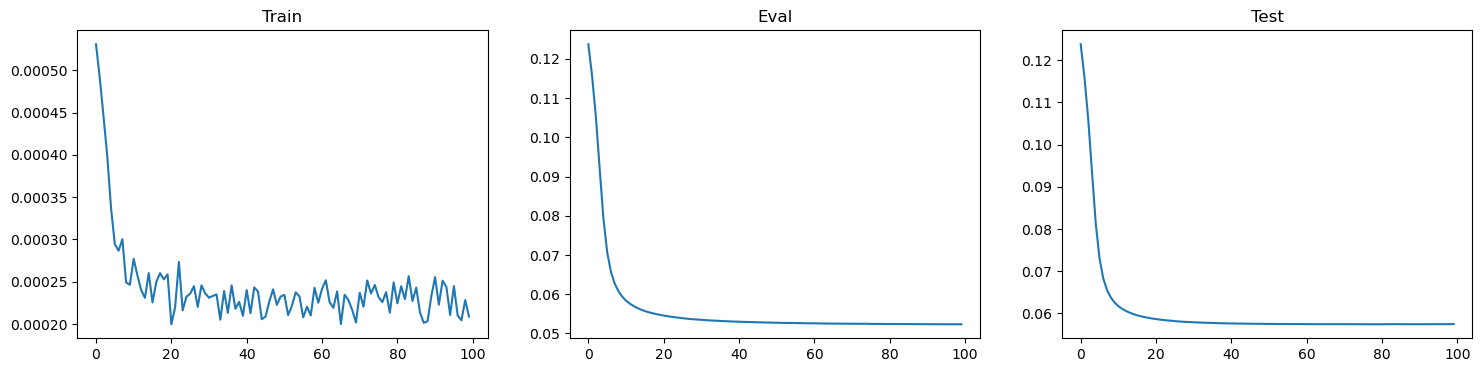

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
2.2857142857142856

In [3]:
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':3,
    'output_dim':5,
    'dropout_prob':.0
}

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    'criterion':nn.MSELoss()
    #'criterion':nn.KLDivLoss(reduction='batchmean')
}
pipe = Pipeline(**args)
pipe.train(epoch=100,lr=1e-3)
pipe.plot_losses()
pipe.eval_model(plot=False)

In [5]:

# importing packages
import scipy.stats as stats
import numpy as np
  
# no of hours a student studies
# in a week vs expected no of hours
observed_data = [8, 6, 10, 7, 8, 11, 100]
expected_data = [9, 8, 11, 8, 10, 7, 6]
  
  
# Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(
    observed_data, expected_data)
  
# chi square test statistic and p value
print('chi_square_test_statistic is : ' +
      str(chi_square_test_statistic))
print('p_value : ' + str(p_value))
  
  
# find Chi-Square critical value
print(stats.chi2.ppf(1-0.05, df=6))

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.5423728813559323

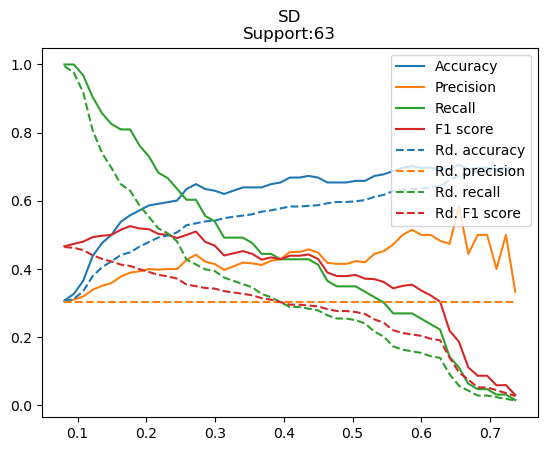

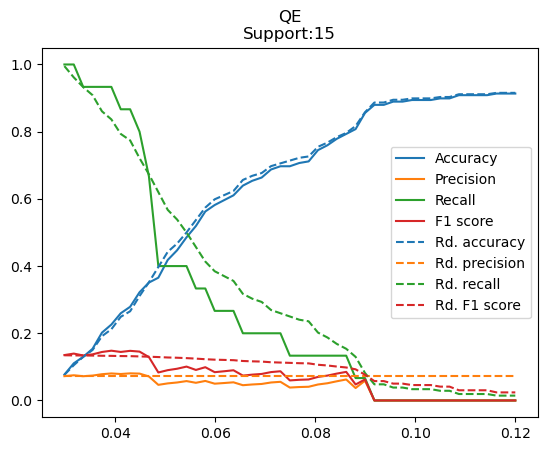

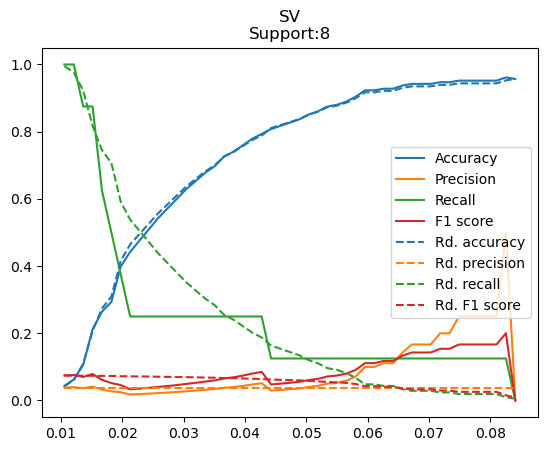

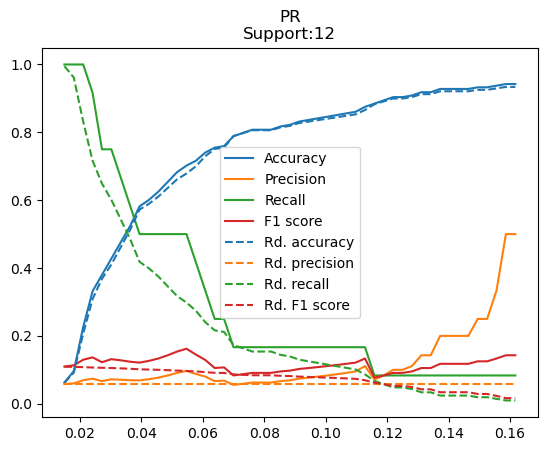

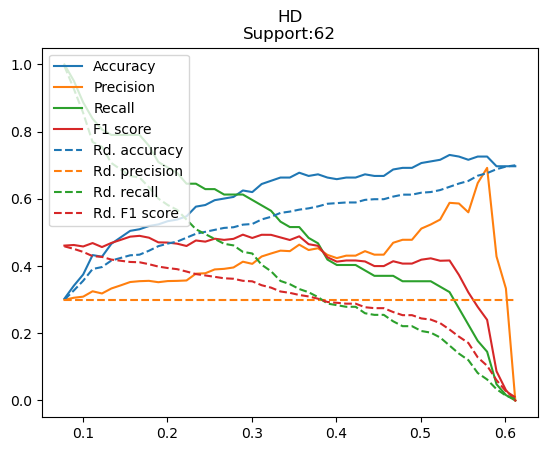

0.6362358787694015

In [ ]:
pipe.eval_model(plot=True)